In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

In [151]:
import warnings
warnings.filterwarnings('ignore')
import pickle

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [231]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [209]:
from sklearn.model_selection import GridSearchCV   #Performing grid search
from sklearn.ensemble import RandomForestRegressor

In [57]:
df=pd.read_csv("green_tripdata_2016-12.csv", header=0)
df.head()

VendorID lpep_pickup_datetime  \
2 2016-12-01 00:00:54  2016-12-01 00:06:54                    N   
  2016-12-01 00:52:41  2016-12-01 00:54:51                    N   
  2016-12-01 00:10:39  2016-12-01 00:14:47                    N   
  2016-12-01 00:12:16  2016-12-01 00:15:31                    N   
  2016-12-01 00:29:22  2016-12-01 00:39:51                    N   

                       lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  \
2 2016-12-01 00:00:54                      1                  92         192   
  2016-12-01 00:52:41                      1                  92         171   
  2016-12-01 00:10:39                      1                  75         238   
  2016-12-01 00:12:16                      1                 166         151   
  2016-12-01 00:29:22                      1                 166          42   

                       PULocationID  DOLocationID  passenger_count  \
2 2016-12-01 00:00:54             1          1.29              6.5   
  2016-12-01 00:52:41             1          0.64              4.0   
  2016-12-01 00:10:39             2          0.89              5.5   
  2016-12-01 00:12:16             1          0.66              4.5   
  2016-12-01 00:29:22             1          2.15              9.5   

                       trip_distance  fare_amount  extra  mta_tax  tip_amount  \
2 2016-12-01 00:00:54            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:52:41            0.5          0.5   1.06      0.0         NaN   
  2016-12-01 00:10:39            0.5          0.5   1.70      0.0         NaN   
  2016-12-01 00:12:16            0.5          0.5   1.74      0.0         NaN   
  2016-12-01 00:29:22            0.5          0.5   2.16      0.0         NaN   

                       tolls_amount  ehail_fee  improvement_surcharge  \
2 2016-12-01 00:00:54           0.3       7.80                      2   
  2016-12-01 00:52:41           0.3       6.36                      1   
  2016-12-01 00:10:39           0.3       8.50                      1   
  2016-12-01 00:12:16           0.3       7.54                      1   
  2016-12-01 00:29:22           0.3      12.96                      1   

                       total_amount  payment_type  trip_type  
2 2016-12-01 00:00:54             1           NaN        NaN  
  2016-12-01 00:52:41             1           NaN        NaN  
  2016-12-01 00:10:39             1           NaN        NaN  
  2016-12-01 00:12:16             1           NaN        NaN  
  2016-12-01 00:29:22             1           NaN        NaN

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1224158 entries, (2, '2016-12-01 00:00:54') to (1, '2016-12-31 23:00:10')
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1224158 non-null  object 
 1   lpep_pickup_datetime   1224158 non-null  object 
 2   lpep_dropoff_datetime  1224158 non-null  int64  
 3   store_and_fwd_flag     1224158 non-null  int64  
 4   RatecodeID             1224158 non-null  int64  
 5   PULocationID           1224158 non-null  int64  
 6   DOLocationID           1224158 non-null  float64
 7   passenger_count        1224158 non-null  float64
 8   trip_distance          1224158 non-null  float64
 9   fare_amount            1224158 non-null  float64
 10  extra                  1224158 non-null  float64
 11  mta_tax                1224158 non-null  float64
 12  tip_amount             0 non-null        float64
 13  tolls_amount           12241

As shown above pd.read_csv is not able to read the rows and columns correctly. The data is not corrcectly split and there are 2 extra null columns at the end that are added. 
So I have to read the csv twice, once for the rows and then for the columns and drop the columns with all null values to align the rows to the columns.

In [59]:
rows = pd.read_csv('green_tripdata_2016-12.csv', skiprows=[0], header = None)
# skip header line

rows = rows.dropna(axis=1, how='all')
# drop columns that only have NaNs

columns = pd.read_csv('green_tripdata_2016-12.csv', nrows=0).columns

In [60]:
rows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,0.3,12.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224153,1,2016-12-31 23:00:16,2016-12-31 23:05:30,N,1,74,75,1,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1
1224154,1,2016-12-31 23:00:20,2016-12-31 23:04:05,N,1,42,41,3,1.00,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1
1224155,1,2016-12-31 23:00:08,2016-12-31 23:15:57,N,1,243,159,1,5.30,18.5,0.5,0.5,3.95,0.0,0.3,23.75,1,1
1224156,1,2016-12-31 23:00:00,2016-12-31 23:10:15,N,1,244,120,3,1.60,8.5,0.5,0.5,0.00,0.0,0.3,9.80,2,1


In [61]:
columns = columns.drop('ehail_fee')

In [62]:
rows.columns = columns

In [63]:
#df1 is the dataframe with the rows and columns aligned
df1 = rows
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,0.3,12.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224153,1,2016-12-31 23:00:16,2016-12-31 23:05:30,N,1,74,75,1,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1
1224154,1,2016-12-31 23:00:20,2016-12-31 23:04:05,N,1,42,41,3,1.00,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1
1224155,1,2016-12-31 23:00:08,2016-12-31 23:15:57,N,1,243,159,1,5.30,18.5,0.5,0.5,3.95,0.0,0.3,23.75,1,1
1224156,1,2016-12-31 23:00:00,2016-12-31 23:10:15,N,1,244,120,3,1.60,8.5,0.5,0.5,0.00,0.0,0.3,9.80,2,1


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224158 entries, 0 to 1224157
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1224158 non-null  int64  
 1   lpep_pickup_datetime   1224158 non-null  object 
 2   lpep_dropoff_datetime  1224158 non-null  object 
 3   store_and_fwd_flag     1224158 non-null  object 
 4   RatecodeID             1224158 non-null  int64  
 5   PULocationID           1224158 non-null  int64  
 6   DOLocationID           1224158 non-null  int64  
 7   passenger_count        1224158 non-null  int64  
 8   trip_distance          1224158 non-null  float64
 9   fare_amount            1224158 non-null  float64
 10  extra                  1224158 non-null  float64
 11  mta_tax                1224158 non-null  float64
 12  tip_amount             1224158 non-null  float64
 13  tolls_amount           1224158 non-null  float64
 14  improvement_surcha

In [65]:
df1.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                  int64
dtype: object

In [66]:
df1.shape

(1224158, 18)

Field Name Description
1. VendorID: A code indicating the LPEP provider that provided the record.
                1= Creative Mobile Technologies, LLC; 
                2= VeriFone Inc.
2. lpep_pickup_datetime: The date and time when the meter was engaged.
3. lpep_dropoff_datetime The date and time when the meter was disengaged.
4. Passenger_count: The number of passengers in the vehicle.
                    This is a driver-entered value.
5. Trip_distance: The elapsed trip distance in miles reported by the taximeter.
6. PULocationID: TLC Taxi Zone in which the taximeter was engaged
7. DOLocationID: TLC Taxi Zone in which the taximeter was disengaged
8. RateCodeID: The final rate code in effect at the end of the trip.
                1= Standard rate
                2=JFK
                3=Newark
                4=Nassau or Westchester
                5=Negotiated fare
                6=Group ride
9. Store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
                Y= store and forward trip
                N= not a store and forward trip
10. Payment_type A numeric code signifying how the passenger paid for the trip.
                1= Credit card
                2= Cash
                3= No charge
                4= Dispute
                5= Unknown
                6= Voided trip
11. Fare_amount: The time-and-distance fare calculated by the meter.
12. Extra: Miscellaneous extras and surcharges. Currently, this only includes
                    the $0.50 and $1 rush hour and overnight charges.
13. MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

14. Improvement_surcharge: $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.
15. Tip_amount Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
16. Tolls_amount: Total amount of all tolls paid in trip.
17. Total_amount: The total amount charged to passengers. Does not include cash tips.
18. Trip_type: A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
                1= Street-hail
                2= Dispatch

In [67]:
df1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06
mean,1.799278e+00,1.085079e+00,1.131729e+02,1.290862e+02,1.362447e+00,2.618179e+00,1.159368e+01,3.629562e-01,4.872578e-01,1.128787e+00,9.456725e-02,2.925184e-01,1.399902e+01,1.534862e+00,1.019722e+00
std,4.005404e-01,5.660195e-01,7.628387e+01,7.723367e+01,1.036924e+00,2.806160e+00,9.793499e+00,3.901575e-01,8.517500e-02,2.216306e+00,8.808537e-01,5.072935e-02,1.112872e+01,5.240995e-01,1.390438e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-8.540000e+00,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.300000e+01,1.290000e+02,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.730000e+02,1.930000e+02,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.656000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.475000e+02,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,2.979800e+02,3.000000e-01,1.008300e+03,5.000000e+00,2.000000e+00


## Data Cleaning
- droped ehail_fee- all transactions are NaNs
- Remove negative observations in variables- fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount.
- Removed observations with 0 trip distance values
- There were 166 trips with passenger count as. Removed observations with passenger count as 0
- Removed outlier values in trip distance as seen from the box plot which are 3 standard deviations away from mean
- converted the pickup time and drop off time into datetime

In [68]:
#### Selecting records where total amount is greater than zero.
dfc = df1[df1['total_amount']>0]
dfc.shape

(1218275, 18)

In [69]:
#Removed negative observations in variables
dfc[dfc['fare_amount']<0]
dfc[dfc['extra']<0]
dfc[dfc['mta_tax']<0]
dfc[dfc['tip_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


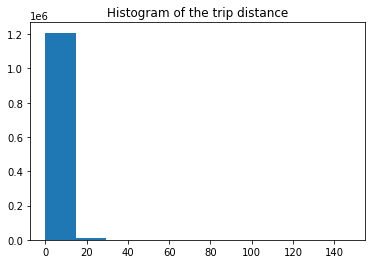

In [70]:
# Plotting a histogram of trip distance.
plt.hist(dfc["trip_distance"])
plt.title('Histogram of the trip distance')
plt.savefig('histogram of trip distance with outliers.png')
plt.show()

<AxesSubplot:xlabel='trip_distance'>

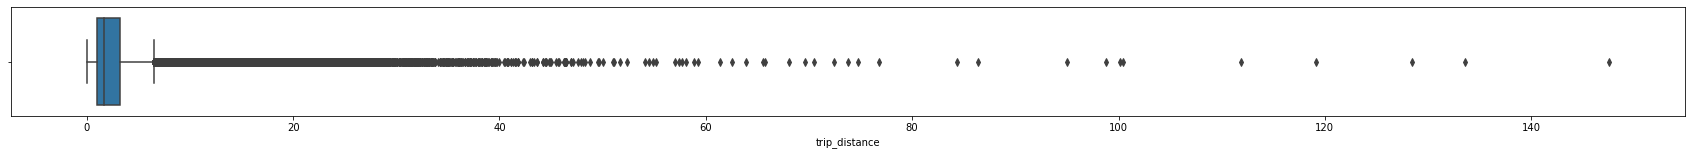

In [71]:
plt.figure(figsize=[30,2])
sns.boxplot(dfc['trip_distance'])

In [72]:
dfc['trip_distance'].describe()

count    1.218275e+06
mean     2.622482e+00
std      2.798613e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.700000e+00
75%      3.200000e+00
max      1.475000e+02
Name: trip_distance, dtype: float64

In [73]:
(dfc['trip_distance'][dfc['trip_distance']==0]).count()

13958

In [74]:
dfc['trip_distance'][(dfc['trip_distance']>=0) & (dfc['trip_distance'] <=11)]

0          1.29
1          0.64
2          0.89
3          0.66
4          2.15
           ... 
1224153    1.20
1224154    1.00
1224155    5.30
1224156    1.60
1224157    0.70
Name: trip_distance, Length: 1194167, dtype: float64

There are 13958 rows out of 1224158 which has 0 trip distance. We need to remove the records which has 0 trip distance and remove outliers as seen in the box plot. We can calculate z score to remove outliers or remove values which are 3 std deviations away from the mean

In [75]:
#keeping records where trip distance is greater than 0.
dfc = dfc[dfc['trip_distance']>0]

#Removing outliers from trip distance
dfc = dfc[~(np.abs(dfc.trip_distance-dfc.trip_distance.mean()) > (3*dfc.trip_distance.std()))]

#Keeping records with passenger count greater than 0.
dfc = dfc[dfc['passenger_count']>0]


In [76]:
dfc.shape

(1180414, 18)

 ## histogram of trip distance
 - plotted the histogram with 50 bins
 - Outliers have been removed before plotting. 
 - Outliers are defined as any point located further than 3 standard deviations from the mean

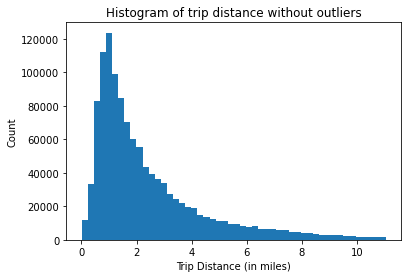

In [77]:
#Plotting histogram with 50 bins.
plt.hist(dfc["trip_distance"],bins = 50)
plt.title('Histogram of trip distance without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.savefig('histogram of trip distance without outliers.png')
plt.show()

- The trip distance is skewed to the right that means the mean is greater than the median. 
- That means most of the data is on the left side of the histogram. 
- This tells us most of the trips are short distance trips between 0-3 miles of distance. 

In [78]:
dfc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,0.3,12.96,1,1


## Find interesting trip statistics grouped by hour

In [79]:
#converting the pickup time and drop off time into datetime
dfc['lpep_pickup_datetime']=pd.to_datetime(dfc['lpep_pickup_datetime'])
dfc['lpep_dropoff_datetime']=pd.to_datetime(dfc['lpep_dropoff_datetime'])

In [80]:
#we have pickup datetime and dropoff datetime converted into datetime
dfc.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                         int64
dtype: object

### Feature Engineering
- Added pickupday, pickupday_no, pickup_hour into dataframe df1. 
- these features are extracted from lpep_pickup_datetime and lpep_dropoff_datetime
- added time of day feature- morning, afternoon, evening, late night
- added is_weekday- 1 for weekday, 0 for weekend

In [81]:
dfc['pickupday']=dfc['lpep_pickup_datetime'].dt.day_name()
dfc['dropoffday']=dfc['lpep_dropoff_datetime'].dt.day_name()

dfc['pickup_day_no']=dfc['lpep_pickup_datetime'].dt.weekday
dfc['dropoff_day_no']=dfc['lpep_dropoff_datetime'].dt.weekday

dfc['pickup_hour']=dfc['lpep_pickup_datetime'].dt.hour
dfc['dropoff_hour']=dfc['lpep_dropoff_datetime'].dt.hour

In [82]:
dfc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,pickupday,dropoffday,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,...,0.3,7.80,2,1,Thursday,Thursday,3,3,0,0
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,...,0.3,6.36,1,1,Thursday,Thursday,3,3,0,0
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,...,0.3,8.50,1,1,Thursday,Thursday,3,3,0,0
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,...,0.3,7.54,1,1,Thursday,Thursday,3,3,0,0
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,...,0.3,12.96,1,1,Thursday,Thursday,3,3,0,0


In [83]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [84]:
dfc['pickup_timeofday']=dfc['pickup_hour'].apply(time_of_day)
dfc['dropoff_timeofday']=dfc['dropoff_hour'].apply(time_of_day)

In [85]:
#returns 1 for weekday and 0 for weekend
def is_weekday(x):
    if x in range(0,5):
        return 1
    else:
        return 0

Integer Value     Day of the week

        0  Monday
        1  Tuesday
        2  Wednesday
        3  Thursday
        4  Friday
        5  Saturday
        6  Sunday

In [86]:
dfc['is_weekday'] = dfc['pickup_day_no'].apply(is_weekday)

In [87]:
# count of number of vendor ID grouped by pickup hour and sorted in descending order. 
groupby_pickup_hour = ((dfc.groupby(dfc['pickup_hour']))['VendorID'].count()).reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
groupby_pickup_hour.values

array([[   19, 84788],
       [   18, 84238],
       [   17, 78417],
       [   20, 76342],
       [   21, 70806],
       [   16, 68247],
       [   22, 65411],
       [   15, 63327],
       [   23, 58195],
       [   14, 54897],
       [   13, 49183],
       [    0, 46985],
       [    9, 46046],
       [   12, 45276],
       [   11, 44864],
       [   10, 44585],
       [    8, 44112],
       [    1, 36588],
       [    7, 29509],
       [    2, 26650],
       [    3, 20637],
       [    4, 16809],
       [    6, 14064],
       [    5, 10438]])

In [88]:
groupby_pickuphour = pd.DataFrame(((dfc.groupby(dfc['pickup_hour']))['VendorID'].count()).reset_index(name='count'))

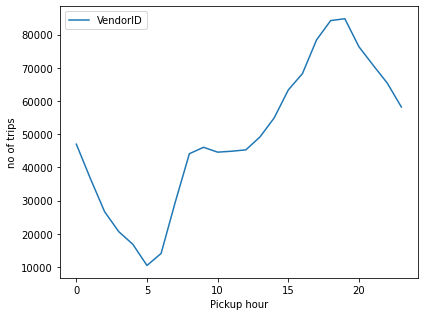

In [89]:
fig, ax = plt.subplots(figsize=(6, 4.5))
groupby_pickuphour['count'].plot()
# set axis labels
ax.set_xlabel('Pickup hour')
ax.set_ylabel('no of trips')

# update legend
ax.legend(ax.get_lines(), df.columns, loc='best', ncol=2)
plt.savefig('Graph plotting pickup hour against no of trips.jpg', dpi=fig.dpi)
plt.tight_layout()

From the above graph we can see that no of trips are 
- maximum around 7 p.m. which could be because people usually go home from work at that hour and 
- minimum at 5 a.m when everyone sleeps :)

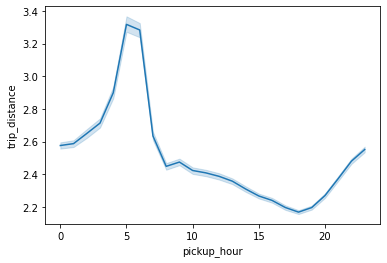

In [90]:
sns.lineplot(x='pickup_hour',y='trip_distance',data=dfc)
plt.savefig('Graph_plotting_pickup_hour_against_trip_distance.jpg')

The above graph plots trip distance against pickup hour and from the graph we can see:
- The trip distance is maximum around 5 a.m. that maybe because of the long distance travel early morning rides. People who live far from there office have to start early to reach work.
- The trip distance is minimum around 6 p.m- 7 p.m.

## The taxi drivers want to know what kind of trip yields better tips. Can you build a model for them and explain the model?

- we will predict whether or not there will be a tip and how much the tip will be
- Will have to build a classification and a regressor model for this
- For example, we could identify that for this particular trip, if the duration is significantly shorter, then we might want to flag to this to the driver. The driver might then speed up a little so as to earn that extra tip. The downsides of this of course, would be that there might be dangerous driving, and the passenger might end up not tipping because of dangerous driving. 

In [91]:
dfc.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,is_weekday
VendorID,1.000000,0.014976,0.011230,0.009097,0.084047,0.004573,0.002050,-0.001613,-0.014666,-0.002056,-0.002261,-0.008395,0.003196,-0.035201,0.016890,0.005532,0.005819,0.010489,0.008168,-0.004823
RatecodeID,0.014976,1.000000,0.037478,0.017695,-0.003591,0.041907,0.126094,-0.104970,-0.956207,-0.014032,0.012869,-0.931871,0.091880,0.033752,0.949814,-0.008882,-0.008517,-0.017194,-0.017062,0.007477
PULocationID,0.011230,0.037478,1.000000,0.147324,0.019983,0.063860,0.049517,0.028382,-0.037725,0.034709,0.013612,-0.037611,0.053097,-0.021098,0.037979,0.023475,0.023718,-0.033668,-0.037801,-0.024968
DOLocationID,0.009097,0.017695,0.147324,1.000000,0.005855,0.122038,0.110564,-0.016130,-0.015642,0.066232,0.022595,-0.015077,0.112276,-0.049090,0.015556,-0.009345,-0.009293,-0.008701,-0.006612,0.004759
passenger_count,0.084047,-0.003591,0.019983,0.005855,1.000000,0.004622,0.006151,0.015029,0.004962,0.003159,0.000410,0.004852,0.007183,-0.004515,-0.004426,0.007679,0.007693,0.002174,0.001204,-0.009909
trip_distance,0.004573,0.041907,0.063860,0.122038,0.004622,1.000000,0.876305,-0.040277,-0.037118,0.364438,0.201564,-0.036082,0.863405,-0.127860,0.036438,0.033902,0.035114,-0.057389,-0.059878,-0.043512
fare_amount,0.002050,0.126094,0.049517,0.110564,0.006151,0.876305,1.000000,-0.033521,-0.114823,0.367677,0.175404,-0.108104,0.969437,-0.123877,0.108631,0.009473,0.010856,-0.030626,-0.027826,-0.007257
extra,-0.001613,-0.104970,0.028382,-0.016130,0.015029,-0.040277,-0.033521,1.000000,0.103156,0.007534,-0.025335,0.101791,0.017140,-0.016397,-0.103488,-0.155553,-0.153381,0.280219,0.265906,0.242482
mta_tax,-0.014666,-0.956207,-0.037725,-0.015642,0.004962,-0.037118,-0.114823,0.103156,1.000000,0.015692,-0.012623,0.961880,-0.081312,-0.035891,-0.982716,0.009238,0.008882,0.015602,0.015343,-0.007786
tip_amount,-0.002056,-0.014032,0.034709,0.066232,0.003159,0.364438,0.367677,0.007534,0.015692,1.000000,0.131844,0.016265,0.566541,-0.573152,-0.017141,0.003475,0.004460,-0.013582,-0.013036,0.000181


From the above correlation we can see that tip_amount is highly correlated with trip_distance, fare amount, total amount and payment type.

In [92]:
dfc.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,is_weekday
count,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06,1.180414e+06
mean,1.800517e+00,1.050468e+00,1.126992e+02,1.288710e+02,1.362155e+00,2.395385e+00,1.088268e+01,3.673517e-01,4.936692e-01,1.052915e+00,6.193509e-02,2.961695e-01,1.319193e+01,1.532283e+00,1.012299e+00,3.280792e+00,3.284763e+00,1.398965e+01,1.397620e+01,6.838753e-01
std,3.996122e-01,4.428925e-01,7.614772e+01,7.728912e+01,1.037989e+00,2.035849e+00,7.114137e+00,3.794744e-01,5.590472e-02,1.895753e+00,6.355673e-01,3.368211e-02,8.170455e+00,5.156249e-01,1.102171e-01,1.868878e+00,1.873348e+00,6.528677e+00,6.619148e+00,4.649624e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.690000e+00,8.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,1.600000e+01,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.680000e+02,1.930000e+02,1.000000e+00,3.100000e+00,1.350000e+01,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.596000e+01,2.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,1.900000e+01,1.900000e+01,1.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.105000e+01,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,9.800000e+01,3.000000e-01,1.008300e+03,5.000000e+00,2.000000e+00,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01,1.000000e+00


### Data Cleaning for tip classification and prediction
- Remove negative observations in variables- fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount ;
- Only select credit card transactions because only credit card tips can be captured in the system;
- Remove variable payment_type, because there are only credit card payments in the remaining data;
- Convert variables into proper (categorical / factor format / date time) formats.

### Payment_type

In [93]:
dfc.payment_type.value_counts()

2    615393
1    559716
3      3048
4      2203
5        54
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

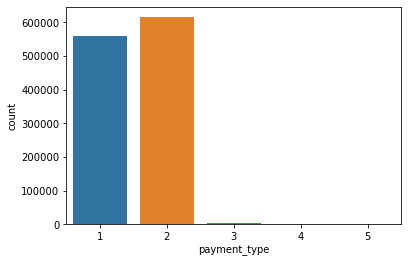

In [94]:
sns.countplot(x='payment_type',data=dfc)

Payment type
1= Credit card
2= Cash

For tips- we have to consider only credit card payment

In [95]:
#created a new df dfcc which has data for only credit card payments
dfcc = dfc[dfc['payment_type']==1]
dfcc.drop('payment_type', axis=1, inplace=True)

In [96]:
dfcc.shape

(559716, 26)

In [97]:
dfcc.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,is_weekday
VendorID,1.000000,0.005507,0.007922,0.004897,0.092018,-0.001163,-0.007221,-0.000573,-0.003431,-0.014613,-0.002249,0.003575,-0.005770,0.006143,0.004926,0.005173,0.008562,0.006663,-0.004423
RatecodeID,0.005507,1.000000,0.030378,0.010827,-0.008094,0.001751,0.161919,-0.089021,-0.975586,0.012554,0.017710,-0.942182,0.127620,0.972310,-0.003982,-0.003673,-0.022796,-0.023370,0.002948
PULocationID,0.007922,0.030378,1.000000,0.108749,0.018523,0.064181,0.047528,0.040525,-0.030012,0.040168,0.014721,-0.030119,0.051958,0.030260,0.033110,0.033460,-0.040915,-0.047839,-0.030923
DOLocationID,0.004897,0.010827,0.108749,1.000000,0.002089,0.113501,0.105146,-0.025466,-0.008480,0.067571,0.020037,-0.007586,0.104153,0.007951,-0.016175,-0.016178,-0.008492,-0.004687,0.012681
passenger_count,0.092018,-0.008094,0.018523,0.002089,1.000000,0.003450,0.004150,0.013676,0.008323,0.004321,-0.000244,0.008397,0.005694,-0.007797,0.007411,0.007577,0.002648,0.001284,-0.008929
trip_distance,-0.001163,0.001751,0.064181,0.113501,0.003450,1.000000,0.883079,-0.060064,0.002301,0.480799,0.207779,0.003687,0.872737,-0.004140,0.040772,0.042183,-0.081277,-0.084083,-0.048571
fare_amount,-0.007221,0.161919,0.047528,0.105146,0.004150,0.883079,1.000000,-0.064314,-0.157749,0.493068,0.183681,-0.148042,0.969988,0.151667,0.013234,0.014825,-0.055593,-0.052426,-0.009546
extra,-0.000573,-0.089021,0.040525,-0.025466,0.013676,-0.060064,-0.064314,1.000000,0.088463,-0.003807,-0.036936,0.086779,-0.017690,-0.089329,-0.163848,-0.161809,0.299028,0.283197,0.242321
mta_tax,-0.003431,-0.975586,-0.030012,-0.008480,0.008323,0.002301,-0.157749,0.088463,1.000000,-0.011675,-0.018587,0.952503,-0.123848,-0.983413,0.003513,0.003215,0.022150,0.022567,-0.002739
tip_amount,-0.014613,0.012554,0.040168,0.067571,0.004321,0.480799,0.493068,-0.003807,-0.011675,1.000000,0.160089,-0.008927,0.670977,0.007762,0.011842,0.012963,-0.019443,-0.018113,-0.011080


### Feature Engineering
- Created variable- tip percentage which is percentage of tip amount from total amount
- Created our target variable- tip_given- 1/0 for classification
- created a categorical variable for trip distance
 - 0-2 miles: short distance
 - 2-7 miles: medium distance
 - 7 and above: large distance

##### tip_percentage

In [98]:
dfcc['tip_perc'] = round((dfcc['tip_amount']/dfcc['total_amount'])*100, 2)
dfcc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickupday,dropoffday,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,is_weekday,tip_perc
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,...,Thursday,Thursday,3,3,0,0,Late night,Late night,1,16.67
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,...,Thursday,Thursday,3,3,0,0,Late night,Late night,1,20.00
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,...,Thursday,Thursday,3,3,0,0,Late night,Late night,1,23.08
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,...,Thursday,Thursday,3,3,0,0,Late night,Late night,1,16.67
5,2,2016-12-01 00:42:02,2016-12-01 00:52:19,N,1,42,151,1,2.82,11.0,...,Thursday,Thursday,3,3,0,0,Late night,Late night,1,0.00


In [99]:
dfcc.shape

(559716, 27)

In [100]:
dfcc['tip_perc'][dfcc['tip_perc']>0].count()/ dfcc['tip_perc'].count()

0.8528557339793753

85% of the total rides have paid tips.

In [101]:
#create tip_given variable for classification
dfcc['tip_given'] = (dfcc.tip_perc>0)*1
dfcc['tip_given'].value_counts()

1    477357
0     82359
Name: tip_given, dtype: int64

In [102]:
dfcc['tip_perc'].describe()

count    559716.000000
mean         14.081777
std           7.507450
min           0.000000
25%          11.190000
50%          16.670000
75%          16.670000
max         100.000000
Name: tip_perc, dtype: float64

In [103]:
#lets look at the passenger count
dfcc['passenger_count'].describe()

count    559716.000000
mean          1.363547
std           1.046118
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

Number of passenger ranges from a minimum of 1 to a maximum of 9.

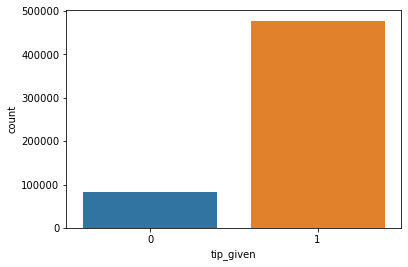

In [257]:
#this could be a class imbalanced dataset
sns.countplot(x='tip_given',data=dfcc)
plt.savefig('tip_given.jpg')

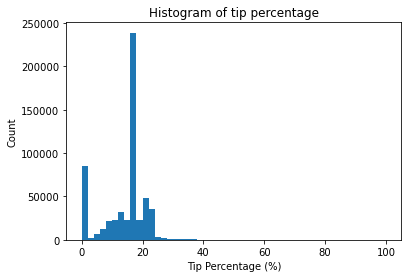

In [177]:
#Plotting histogram with 50 bins.
plt.hist(dfcc["tip_perc"],bins = 50)
plt.title('Histogram of tip percentage')
plt.xlabel('Tip Percentage (%)')
plt.ylabel('Count')
plt.savefig('Histogram of tip percentage.jpg')
plt.show()

The distribution of the tip percentage is shown above. The mean tip percentage was 14.08% with a standard deviation of 7.5%. The tip percentage does not follow a normal distribution and is centered around a few typical values, i.e., 0%, 16-18%, 20%, 23%. 

Text(0.5, 1.0, 'The Average Trip percentage per Dropoff Day of the week')

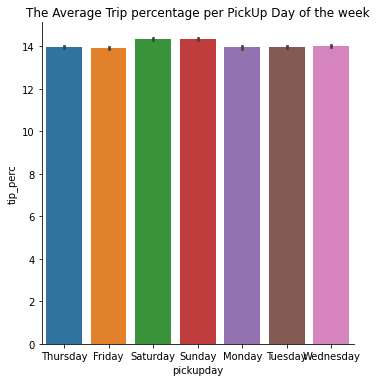

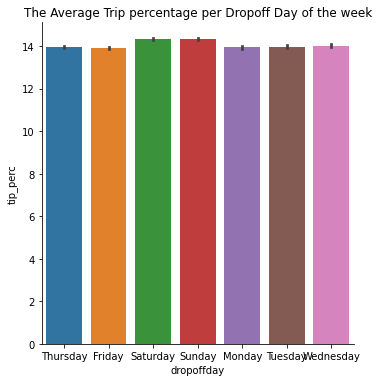

In [170]:
sns.catplot(x="pickupday",y="tip_perc",kind="bar",data=dfcc,height=5,aspect=1)
plt.title('The Average Trip percentage per PickUp Day of the week')
sns.catplot(x="dropoffday",y="tip_perc",kind="bar",data=dfcc,height=5,aspect=1)
plt.title('The Average Trip percentage per Dropoff Day of the week')

The above graph shows us that the tip percentage was slightly higher on Saturday and Sunday but there is not much difference otherwise.

In [171]:
sort_by_trip_distance = dfcc.sort_values('trip_distance', ascending=False)
sort_by_trip_distance.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,trip_type,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,is_weekday,tip_perc,tip_given
count,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,...,559716.000000,559716.00000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000,559716.000000
mean,1.804921,1.034641,114.335138,132.801405,1.363547,2.673557,11.822583,0.373943,0.495784,2.220364,...,0.297405,15.37490,1.008195,3.270435,3.275604,13.958995,13.942624,0.689153,14.081777,0.852856
std,0.396262,0.367948,77.494803,77.963521,1.046118,2.189824,7.612024,0.377637,0.045717,2.230663,...,0.027782,9.11975,0.090156,1.858722,1.863375,6.628301,6.718574,0.462841,7.507450,0.354250
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.000000,62.000000,1.000000,1.090000,6.500000,0.000000,0.500000,1.060000,...,0.300000,8.91000,1.000000,2.000000,2.000000,9.000000,9.000000,0.000000,11.190000,1.000000
50%,2.000000,1.000000,83.000000,133.000000,1.000000,1.910000,9.500000,0.500000,0.500000,1.950000,...,0.300000,12.73000,1.000000,3.000000,3.000000,16.000000,16.000000,1.000000,16.670000,1.000000
75%,2.000000,1.000000,179.000000,198.000000,1.000000,3.530000,15.000000,0.500000,0.500000,2.960000,...,0.300000,18.96000,1.000000,5.000000,5.000000,19.000000,19.000000,1.000000,16.670000,1.000000
max,2.000000,5.000000,265.000000,265.000000,9.000000,11.050000,499.000000,4.500000,0.500000,250.700000,...,0.300000,499.00000,2.000000,6.000000,6.000000,23.000000,23.000000,1.000000,100.000000,1.000000


In [172]:
def trip_dist_cat(x):
    if x<2.0:
        return "short_distance"
    elif 2.0< x <7.0:
        return "medium_distance"
    else:
        return "long distance"
    

In [173]:
dfcc['trip_distance_cat'] = dfcc['trip_distance'].apply(trip_dist_cat)
dfcc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,is_weekday,tip_perc,tip_given,trip_distance_cat
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,...,3,3,0,0,Late night,Late night,1,16.67,1,short_distance
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,...,3,3,0,0,Late night,Late night,1,20.00,1,short_distance
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,...,3,3,0,0,Late night,Late night,1,23.08,1,short_distance
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,...,3,3,0,0,Late night,Late night,1,16.67,1,medium_distance
5,2,2016-12-01 00:42:02,2016-12-01 00:52:19,N,1,42,151,1,2.82,11.0,...,3,3,0,0,Late night,Late night,1,0.00,0,medium_distance


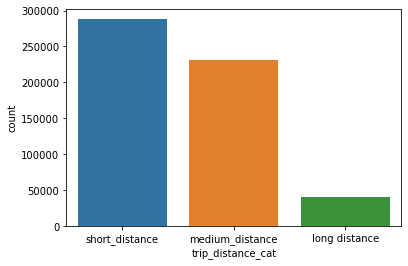

In [258]:
sns.countplot(x='trip_distance_cat',data=dfcc)
plt.savefig('tip_distance_category.jpg')

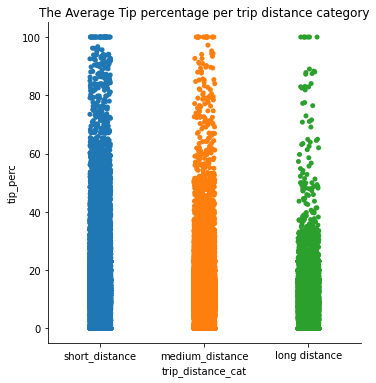

In [267]:
sns.catplot(x="trip_distance_cat",y="tip_perc",kind="strip",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per trip distance category')
plt.savefig('The Average Tip percentage per trip distance category2.jpg')

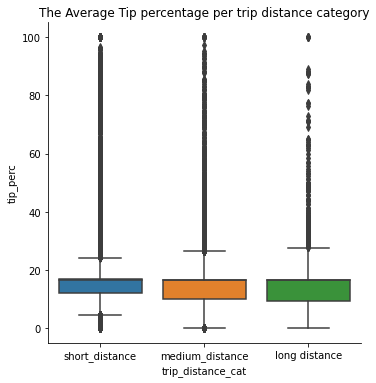

In [260]:
sns.catplot(x="trip_distance_cat",y="tip_perc",kind="box",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per trip distance category')
plt.savefig('The Average Tip percentage per trip distance category.jpg')

From the above 2 plot we can see that 
- tip percentage are higher for short distances as compared to medium and long distances.
- Also riders taking shorter trips between 0 and 2 miles are more likely to tip.
- the average trip is around 14% for all distances.

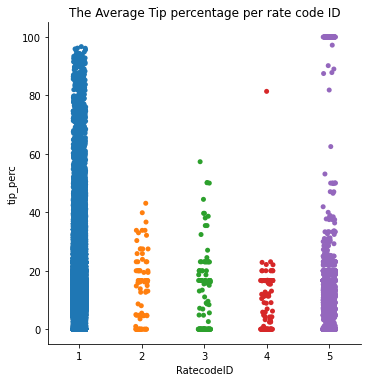

In [261]:
sns.catplot(x="RatecodeID",y="tip_perc",kind="strip",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per rate code ID')
plt.savefig('The Average Tip percentage per rate code ID.jpg')

The rate code id 1 and 5 yeilds more tips as compared to other.

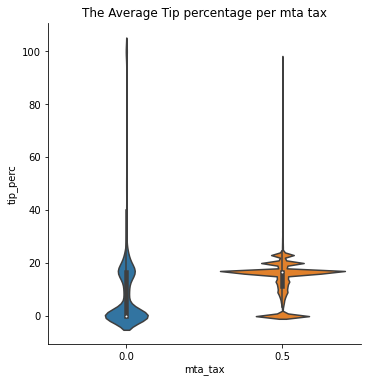

In [262]:
sns.catplot(x="mta_tax",y="tip_perc",kind="violin",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per mta tax')
plt.savefig('The Average Tip percentage per mta tax.jpg')

The tip percentage is higher for mta tax of 0.5.

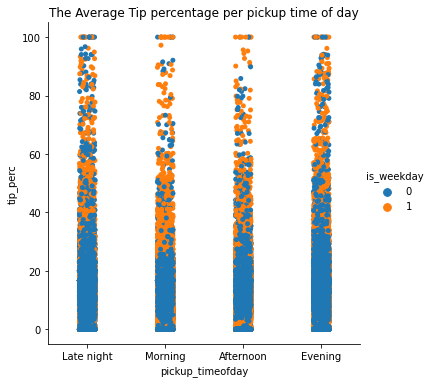

In [263]:
sns.catplot(x="pickup_timeofday",y="tip_perc",hue="is_weekday",kind="strip",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per pickup time of day')
plt.savefig('The Average Tip percentage per pickup time of day.jpg')

The tips are usually given more 
- if its a weekend.
- During Latenight and Evening times

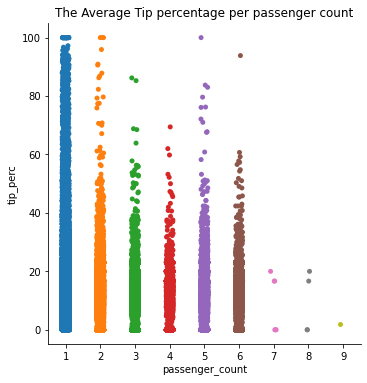

In [264]:
sns.catplot(x="passenger_count",y="tip_perc",kind="strip",data=dfcc,height=5,aspect=1)
plt.title('The Average Tip percentage per passenger count')
plt.savefig('The Average Tip percentage per passenger count.jpg')

Passenger count
- 1 gives the most and the maximum tips
- 2-6 gives lesser tips as compared to 1.
- 7 and above give minimal tips.

Classification

- One-hot encoded categorical variables
- Split data into features and labels
- Converted to arrays
- Split data into training and testing sets

#### Encoding
Next step is to convert categorical data: user, application and device_type into numeric values to be able to use in our model. We will be using one hot encoding to achieve the same.

In [106]:
dfcc.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_type', 'pickupday', 'dropoffday', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_timeofday',
       'dropoff_timeofday', 'is_weekday', 'tip_perc', 'tip_given'],
      dtype='object')

In [107]:
s = dfcc['PULocationID'].value_counts()
s.describe()

count      226.000000
mean      2476.619469
std       6058.153971
min          1.000000
25%         11.250000
50%        127.000000
75%        856.500000
max      32907.000000
Name: PULocationID, dtype: float64

In [108]:
dft = dfcc[['VendorID','store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tolls_amount', 'improvement_surcharge',
       'trip_type', 'pickup_day_no', 'dropoff_day_no', 'pickup_timeofday',
       'dropoff_timeofday', 'is_weekday','tip_given']]


In [109]:
dfx = pd.get_dummies(dft, columns=['VendorID','store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'improvement_surcharge',
       'trip_type', 'pickup_day_no', 'dropoff_day_no', 'pickup_timeofday',
       'dropoff_timeofday','is_weekday'])

In [110]:
list(dfx.columns)

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'tip_given',
 'VendorID_1',
 'VendorID_2',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'RatecodeID_1',
 'RatecodeID_2',
 'RatecodeID_3',
 'RatecodeID_4',
 'RatecodeID_5',
 'PULocationID_1',
 'PULocationID_3',
 'PULocationID_6',
 'PULocationID_7',
 'PULocationID_8',
 'PULocationID_9',
 'PULocationID_10',
 'PULocationID_11',
 'PULocationID_14',
 'PULocationID_15',
 'PULocationID_16',
 'PULocationID_17',
 'PULocationID_18',
 'PULocationID_19',
 'PULocationID_20',
 'PULocationID_21',
 'PULocationID_22',
 'PULocationID_23',
 'PULocationID_24',
 'PULocationID_25',
 'PULocationID_26',
 'PULocationID_28',
 'PULocationID_29',
 'PULocationID_31',
 'PULocationID_32',
 'PULocationID_33',
 'PULocationID_34',
 'PULocationID_35',
 'PULocationID_36',
 'PULocationID_37',
 'PULocationID_38',
 'PULocationID_39',
 'PULocationID_40',
 'PULocationID_41',
 'PULocationID_42',
 'PULocationID_43',
 'PULocationID_46',
 'PULocationID

In [248]:
target = ['tip_given']
test = dfx
test1 = test.drop(target, axis = 1)

In [265]:
test.shape, test1.shape

((559716, 532), (559716, 531))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
        np.array(test1),
        np.array(test[target]),
        test_size=0.4,
        random_state=0)

In [120]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((335829, 531), (335829, 1), (223887, 531), (223887, 1))

In [121]:
%%time
clf1 = RandomForestClassifier(n_estimators=500,
                                  max_depth=3,
                                  max_features=0.7,
                                  random_state=0)
score1 = clf1.fit(X_train, y_train).predict(X_test)

CPU times: user 19min 49s, sys: 5.21 s, total: 19min 55s
Wall time: 19min 59s


In [152]:
# save the model to disk
pickle.dump(clf1, open('RandomForestClassifier_tip.p', 'wb'))

In [158]:
conf_matrix1 = confusion_matrix(y_test, score1)
precision_recall_fscore = precision_recall_fscore_support(y_test, score1, average='micro')
print(accuracy_score(y_test, score1))
print(precision_recall_fscore)
print(conf_matrix1)

0.853560054849098
(0.853560054849098, 0.853560054849098, 0.853560054849098, None)
[[   843  32314]
 [   472 190258]]


Random forest classification is giving an accuracy of 85.3% with a f1 score of 85.3%.

In [147]:
# What are the most important features?
import operator
dict_feat_imp = dict(zip(list(test1.columns.values),clf1.feature_importances_))
sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

[('mta_tax', 0.2907136347451122),
 ('DOLocationID_42', 0.20359321321979165),
 ('PULocationID_42', 0.19594252457015687),
 ('RatecodeID_5', 0.10106315959427858),
 ('RatecodeID_1', 0.06244041019349582),
 ('fare_amount', 0.042661665267240925),
 ('PULocationID_255', 0.021532910920869792),
 ('trip_type_2', 0.01873259944923071),
 ('trip_type_1', 0.018724338895636888),
 ('trip_distance', 0.015291294232889517),
 ('DOLocationID_74', 0.011755192346748334),
 ('PULocationID_247', 0.0037230852561383736),
 ('DOLocationID_41', 0.003143932476963085),
 ('DOLocationID_138', 0.002004144151647903),
 ('VendorID_1', 0.0016878298849233053),
 ('VendorID_2', 0.001548143496507161),
 ('PULocationID_130', 0.0011809784385708344),
 ('PULocationID_159', 0.0010141620751593639),
 ('PULocationID_66', 0.0008164068265997004),
 ('PULocationID_166', 0.0006705475175910488),
 ('DOLocationID_159', 0.00039460212440689134),
 ('PULocationID_69', 0.00015105477514934827),
 ('PULocationID_115', 0.00013971491152448129),
 ('tolls_amou

From the above we can see that tips are paid if following conditions are true:
- mta_tax is paid.
- Pickup and drop off location number 42 which when checked online is Manhattan- Central Harlem North.
- Rate code id 1 and 5- which are standard rate and negotiated fare resp.
- Fare amount is higher
- Pickup location id 255- Brooklyn	Williamsburg (North Side)
- trip distance is lower.

### Classification using gradient boosting algorithm
- Sample size for training and optimization was chosen as 100000. This is a small sample size compared to the available data but the optimization was stable and good enough with 5 folds cross-validation
- For this classification we have identified the predictors from our visualization analysis and feature importance obtained from our random forest algorithm
- The number of trees were optimized using gridsearchCV
- optimized number of trees: 70

In [251]:
#DATA
test[['mta_tax','DOLocationID_42','PULocationID_42', 'RatecodeID_5', 'RatecodeID_1', 'fare_amount', 
           'PULocationID_255', 'trip_distance', 'DOLocationID_74', 'PULocationID_247', 'DOLocationID_41', 
           'DOLocationID_138', 'PULocationID_130', 'PULocationID_159', 'PULocationID_66','PULocationID_166',
           'DOLocationID_159','PULocationID_69', 'PULocationID_115', 'is_weekday_0','tolls_amount', 
           'passenger_count_1', 'passenger_count_2','pickup_timeofday_Evening', 'dropoff_timeofday_Evening',
           'pickup_timeofday_Late night', 'tip_given']]

,mta_tax,DOLocationID_42,PULocationID_42,RatecodeID_5,RatecodeID_1,fare_amount,PULocationID_255,trip_distance,DOLocationID_74,PULocationID_247,...,PULocationID_69,PULocationID_115,is_weekday_0,tolls_amount,passenger_count_1,passenger_count_2,pickup_timeofday_Evening,dropoff_timeofday_Evening,pickup_timeofday_Late night,tip_given
1,0.5,0,0,0,1,4.0,0,0.64,0,0,...,0,0,0,0.0,1,0,0,0,1,1
2,0.5,0,0,0,1,5.5,0,0.89,0,0,...,0,0,0,0.0,0,1,0,0,1,1
3,0.5,0,0,0,1,4.5,0,0.66,0,0,...,0,0,0,0.0,1,0,0,0,1,1
4,0.5,1,0,0,1,9.5,0,2.15,0,0,...,0,0,0,0.0,1,0,0,0,1,1
5,0.5,0,1,0,1,11.0,0,2.82,0,0,...,0,0,0,0.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224135,0.5,0,0,0,1,5.0,0,0.80,0,0,...,0,0,1,0.0,0,1,0,0,1,1
1224138,0.5,0,0,0,1,7.0,0,1.10,0,0,...,0,0,1,0.0,1,0,0,0,1,1
1224146,0.5,0,0,0,1,6.0,0,1.30,1,0,...,0,0,1,0.0,1,0,0,0,1,0
1224149,0.5,0,0,0,1,5.0,0,0.60,0,0,...,0,0,1,0.0,1,0,0,0,1,1


Optimizing the classifier...
GradientBoostingClassifier(max_depth=5, max_features='auto', n_estimators=70,
                           random_state=10, subsample=0.8) {'n_estimators': 70} 0.6207858098819857 5

Model report:
Accuracy: 0.85761
AUC Score (Train): 0.6370981062733685
CV Score - Mean : 0.6207858 | Std : 0.006088671 | Min : 0.6126969 | Max : 0.6269588


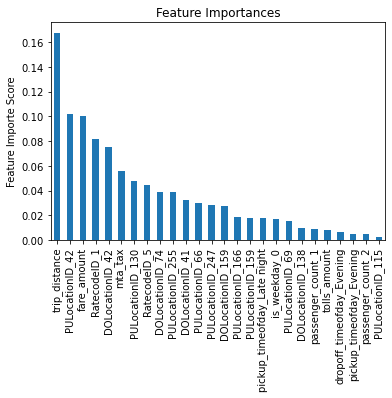

Processing time: 0:02:14.233322


In [255]:
## OPTIMIZATION & TRAINING OF THE CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
print ("Optimizing the classifier...")

train = test.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=100000,replace=False)]
target = 'tip_given' # set target variable - it will be used later in optimization

tic = datetime.now() # initiate the timing
# for predictors start with candidates identified during the EDA and feature importance of previous model
predictors = ['mta_tax','DOLocationID_42','PULocationID_42', 'RatecodeID_5', 'RatecodeID_1', 'fare_amount', 
           'PULocationID_255', 'trip_distance', 'DOLocationID_74', 'PULocationID_247', 'DOLocationID_41', 
           'DOLocationID_138', 'PULocationID_130', 'PULocationID_159', 'PULocationID_66','PULocationID_166',
           'DOLocationID_159','PULocationID_69', 'PULocationID_115', 'is_weekday_0','tolls_amount', 
           'passenger_count_1', 'passenger_count_2','pickup_timeofday_Evening', 'dropoff_timeofday_Evening',
           'pickup_timeofday_Late night']

# optimize n_estimator through grid search
param_test = {'n_estimators':range(30,151,20)} # define range over which number of trees is to be optimized


# initiate classification model
model_cls = GradientBoostingClassifier(
    learning_rate=0.1, # use default
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    subsample=0.8, # try <1 to decrease variance and increase bias
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print (gs_cls.best_estimator_, gs_cls.best_params_, gs_cls.best_score_, gs_rfr.n_splits_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')

# save the best estimator on disk as pickle for a later use
with open('gradient_classifier.p','wb') as fid:
    pickle.dump(gs_cls.best_estimator_,fid)
    fid.close()
    
print ("Processing time:", datetime.now()-tic)

### Regression
- To find out the tip percentage paid by the trips. 
- We will run the regression model for data which has tip>0
- The factors which help increase the percentage of tips

In [268]:
#PREPARING THE DATA
dfr = dfcc[['VendorID','store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tolls_amount', 'improvement_surcharge',
       'trip_type', 'pickup_day_no', 'dropoff_day_no', 'pickup_timeofday',
       'dropoff_timeofday', 'is_weekday','tip_perc','tip_given']]

dfrx = pd.get_dummies(dfr, columns=['RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'improvement_surcharge',
       'trip_type', 'pickup_day_no', 'dropoff_day_no', 'pickup_timeofday',
       'dropoff_timeofday','is_weekday'])

targetr = ['tip_perc']
testr = dfrx[dfrx['tip_given']>0]
testr.drop('tip_given', axis=1, inplace= True)
testr1 = testr.drop(targetr, axis = 1)

print(testr.shape, testr1.shape)

(477357, 530) (477357, 529)


In [269]:
testr[['mta_tax','DOLocationID_42','PULocationID_42', 'RatecodeID_5', 'RatecodeID_1', 'fare_amount', 
           'PULocationID_255', 'trip_distance', 'DOLocationID_74', 'PULocationID_247', 'DOLocationID_41', 
           'DOLocationID_138', 'PULocationID_130', 'PULocationID_159', 'PULocationID_66','PULocationID_166',
           'DOLocationID_159','PULocationID_69', 'PULocationID_115', 'is_weekday_0','tolls_amount', 
           'passenger_count_1', 'passenger_count_2','pickup_timeofday_Evening', 'dropoff_timeofday_Evening',
           'pickup_timeofday_Late night']]

,mta_tax,DOLocationID_42,PULocationID_42,RatecodeID_5,RatecodeID_1,fare_amount,PULocationID_255,trip_distance,DOLocationID_74,PULocationID_247,...,DOLocationID_159,PULocationID_69,PULocationID_115,is_weekday_0,tolls_amount,passenger_count_1,passenger_count_2,pickup_timeofday_Evening,dropoff_timeofday_Evening,pickup_timeofday_Late night
1,0.5,0,0,0,1,4.0,0,0.64,0,0,...,0,0,0,0,0.0,1,0,0,0,1
2,0.5,0,0,0,1,5.5,0,0.89,0,0,...,0,0,0,0,0.0,0,1,0,0,1
3,0.5,0,0,0,1,4.5,0,0.66,0,0,...,0,0,0,0,0.0,1,0,0,0,1
4,0.5,1,0,0,1,9.5,0,2.15,0,0,...,0,0,0,0,0.0,1,0,0,0,1
11,0.5,0,0,0,1,9.5,0,2.22,0,0,...,0,0,0,0,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224133,0.5,1,0,0,1,5.5,0,0.90,0,0,...,0,0,0,1,0.0,1,0,0,0,1
1224135,0.5,0,0,0,1,5.0,0,0.80,0,0,...,0,0,0,1,0.0,0,1,0,0,1
1224138,0.5,0,0,0,1,7.0,0,1.10,0,0,...,0,0,0,1,0.0,1,0,0,0,1
1224149,0.5,0,0,0,1,5.0,0,0.60,0,0,...,0,0,0,1,0.0,1,0,0,0,1


In [220]:
%%time
from datetime import datetime
print("start")
train = testr.copy()
train = train.loc[np.random.choice(train.index,size=100000,replace=False)]
indices = testr.index[~testr.index.isin(train.index)]
test = testr.loc[np.random.choice(indices,size=100000,replace=False)]

train['ID'] = train.index
IDCol = 'ID'
target = 'tip_perc'

predictors = ['mta_tax','DOLocationID_42','PULocationID_42', 'RatecodeID_5', 'RatecodeID_1', 'fare_amount', 
           'PULocationID_255', 'trip_distance', 'DOLocationID_74', 'PULocationID_247', 'DOLocationID_41', 
           'DOLocationID_138', 'PULocationID_130', 'PULocationID_159', 'PULocationID_66','PULocationID_166',
           'DOLocationID_159','PULocationID_69', 'PULocationID_115', 'is_weekday_0','tolls_amount', 
           'passenger_count_1', 'passenger_count_2','pickup_timeofday_Evening', 'dropoff_timeofday_Evening',
           'pickup_timeofday_Late night']

def optimize_num_trees(alg,param_test,scoring_method,train,predictors,target):
    """
    This functions is used to tune paremeters of a predictive algorithm
    alg: sklearn model,
    param_test: dict, parameters to be tuned
    scoring_method: str, method to be used by the cross-validation to valuate the model
    train: pandas.DataFrame, training data
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    """
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    return gsearch


from sklearn.ensemble import RandomForestRegressor
# optimize n_estimator through grid search
param_test = {'n_estimators':range(50,200,25)} # define range over which number of trees is to be optimized
# initiate regression model
rfr = RandomForestRegressor()
print("regressor built")

start
regressor built
CPU times: user 533 ms, sys: 278 ms, total: 811 ms
Wall time: 1.39 s


In [228]:
# get results of the search grid
gs_rfr = optimize_num_trees(rfr,param_test,'neg_mean_squared_error' ,train,predictors,target)
print (gs_rfr.best_estimator_, gs_rfr.best_params_, gs_rfr.best_score_, gs_rfr.n_splits_)

RandomForestRegressor(n_estimators=175) {'n_estimators': 175} -28.696249063400252 5


Regression modeling:
- Sample size for training and optimization was chosen as 100000. This is  a small sample size compared to the available data but the optimization was stable and good enough with 5 folds cross-validation
- The number of trees were optimized
- Mean square
Results:

- optimized number of trees: 175
- no of splits for cross validation: 5


Model report:
Accuracy: 10.83688556813297
CV Score - Mean : -28.71743 | Std : 0.4931297 | Min : -29.70292 | Max : -28.44865


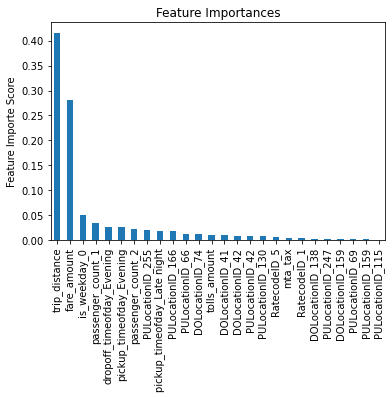

In [235]:
# define a function that help to train models and perform cv
def modelfit(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):
    """
    This functions train the model given as 'alg' by performing cross-validation. It works on both regression and classification
    alg: sklearn model
    dtrain: pandas.DataFrame, training set
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    scoring_method: str, method to be used by the cross-validation to valuate the model
    performCV: bool, perform Cv or not
    printFeatureImportance: bool, plot histogram of features importance or not
    cv_folds: int, degree of cross-validation
    """
    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross-validation
    if performCV:
        cv_score = cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        #print model report
        print ("\nModel report:")
        if scoring_method == 'roc_auc':
            print ("Accuracy:",metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print ("AUC Score (Train):",metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        if (scoring_method == 'neg_mean_squared_error'):
            print ("Accuracy:",metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print ("CV Score - Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()

# cross validate the best model with optimized number of estimators
modelfit(gs_rfr.best_estimator_,train,predictors,target,'neg_mean_squared_error' )

# save the best estimator on disk as pickle for a later use
with open('regression_tip.p','wb') as fid:
    pickle.dump(gs_rfr.best_estimator_,fid)
    fid.close()

### Conclusion
* The most important features for getting better trips is as follows:
    - trip distance- lower the trip distance, higher the tip percentage
    - fare amount- higher the fare amount more the tip.
    - is weekday- get better tips on weekend
    - The tips are better for passenger count of 1-2.
    - Pickup and drop off time of evening and late night
    - tolls amount and mta tax also have some role to play in determining the tips.
    - Some pickup and dropoff locations in Manhattan and brooklyn are said to yeild better tips.

## Visualize the data to help understand trip patterns

In [123]:
dfcc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoffday,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,is_weekday,tip_perc,tip_given
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,...,Thursday,3,3,0,0,Late night,Late night,1,16.67,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,...,Thursday,3,3,0,0,Late night,Late night,1,20.00,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,...,Thursday,3,3,0,0,Late night,Late night,1,23.08,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,...,Thursday,3,3,0,0,Late night,Late night,1,16.67,1
5,2,2016-12-01 00:42:02,2016-12-01 00:52:19,N,1,42,151,1,2.82,11.0,...,Thursday,3,3,0,0,Late night,Late night,1,0.00,0


### VendorID
- vendor_id — a code for the provider associated with the trip record

In [124]:
dfcc.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_type', 'pickupday', 'dropoffday', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_timeofday',
       'dropoff_timeofday', 'is_weekday', 'tip_perc', 'tip_given'],
      dtype='object')

In [125]:
dfcc['VendorID'].value_counts()

2    450527
1    109189
Name: VendorID, dtype: int64

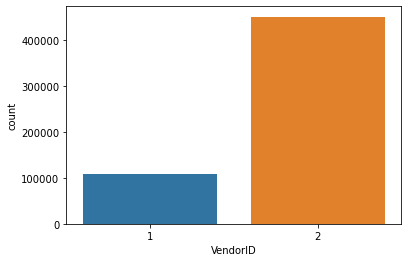

In [274]:
sns.countplot('VendorID',data=dfcc)
plt.savefig('VendorID.jpg')

There is a 4 times difference between the trips taken by vendor ID 1 and 2 for December 2016. 

#### Trip Distance per VendorID

In [127]:
dfcc['trip_distance'].describe()

count    559716.000000
mean          2.673557
std           2.189824
min           0.010000
25%           1.090000
50%           1.910000
75%           3.530000
max          11.050000
Name: trip_distance, dtype: float64

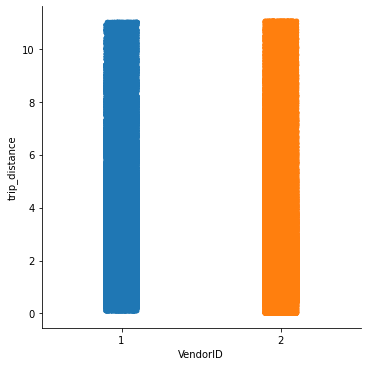

In [281]:
#sns.barplot(y='trip_distance',x='VendorID',data=dfcc, estimator=np.mean)
sns.catplot(y='trip_distance',x='VendorID',data=dfcc, kind='strip')
plt.savefig('visualizations/distribution_of_vendors_with_trip_distance.jpg')

The distribution of both vendors in terms of trip distance is same. Which means there is no particular vendor who is taking longer or shorter trips.

#### Passenger count per VendorID

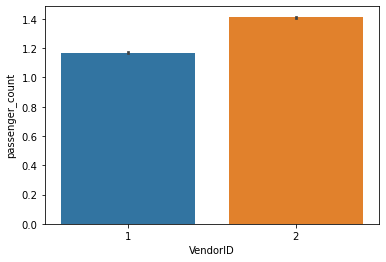

In [282]:
sns.barplot(y='passenger_count',x='VendorID',data=dfcc)
plt.savefig('visualizations/passenger_count_per_vendors.jpg')

This shows that vendor 2 generally carries more passengers as compared to vendor 1.

### store_and_fwd_flag

In [279]:
dfc['store_and_fwd_flag'].value_counts()

N    1178533
Y       1881
Name: store_and_fwd_flag, dtype: int64

There were less than 0.01% trips that were stored before forwarding

In [280]:
1881/1178533

0.0015960520409695784

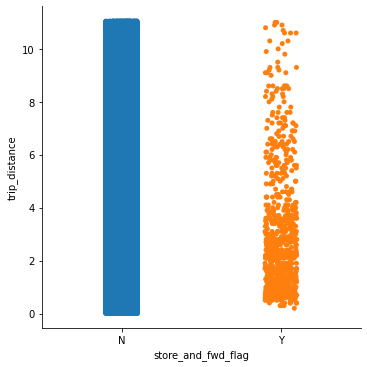

In [283]:
sns.catplot(y='trip_distance',x='store_and_fwd_flag',data=dfcc, kind='strip')
plt.savefig('visualizations/storeandfwd_tripdist.jpg')

- Most of the time the trip is not stored. 
- When the trips are stored, it is done mostly for shorter distances.

### RatecodeID
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride

In [133]:
dfc['RatecodeID'].value_counts()

1    1164857
5      14373
2        607
4        287
3        279
6         11
Name: RatecodeID, dtype: int64

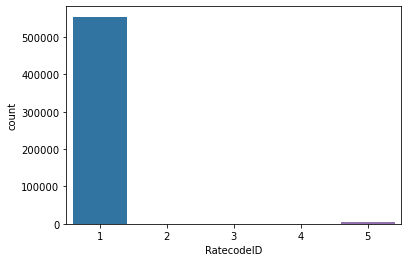

In [284]:
sns.countplot('RatecodeID',data=dfcc)
plt.savefig('visualizations/ratecodeID.jpg')

- Most of the trips are standard code trips and 
- 0.012% of those have negotiated fare. 

### Passenger count

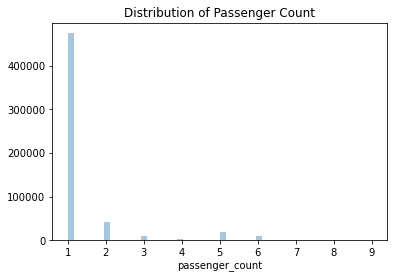

In [285]:
sns.distplot(dfcc['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.savefig('visualizations/Distribution_of_passenger_count.jpg')

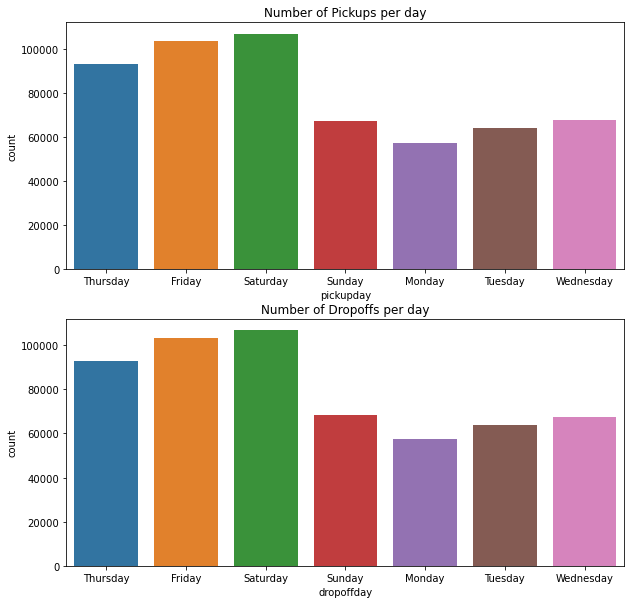

In [286]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickupday',data=dfcc,ax=ax[0])
ax[0].set_title('Number of Pickups per day')
sns.countplot(x='dropoffday',data=dfcc,ax=ax[1])
ax[1].set_title('Number of Dropoffs per day')
plt.savefig('visualizations/no_of_pickups_dropoffs_per_day.jpg')

The above graphs shows the distribution of number of pickups and dropoffs on each day of the week. We can see from the graph that maximum pickups and dropoffs are on Saturay followed by Friday. This could also be because December being holday season, People must be travelling to relatives and nearby places to spend time and enjoy.

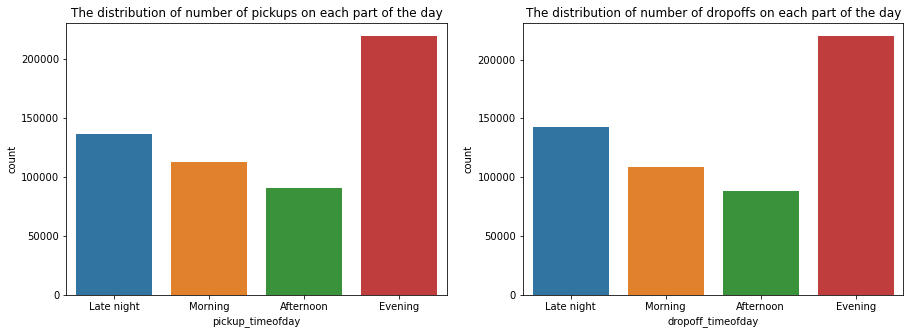

In [287]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_timeofday',data=dfcc,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timeofday',data=dfcc,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.savefig('visualizations/no_of_pickups_dropoffs_each_time_of_day.jpg')

The above graphs shows the distribution of number of pickups and dropoffs on each time of the day. We can see from the graph that maximum pickups and dropoffs are in the evening and least are in the afternoon.

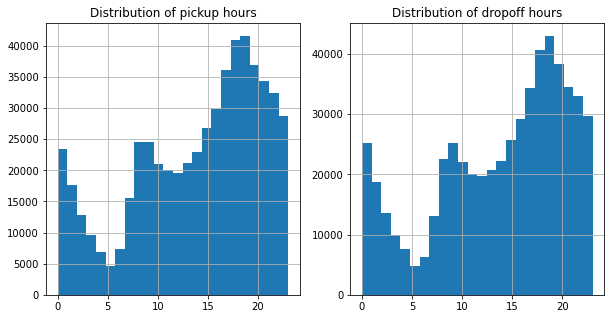

In [288]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
dfcc.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
dfcc.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')
plt.savefig('visualizations/distribution_pickups_dropoffs_hours.jpg')

- The above graph tells the same story as the distribution by time of day. 
- These graphs tells us the maximum pickups and dropoffs are between 6-8 p.m. in the evening which can be due to office going people and 
- It also suggests that people prefer taking public transport in the morning hours and take a cab during the evening hours when going back home.
- minimum are between 4-6 a.m. in the morning.

### total amount

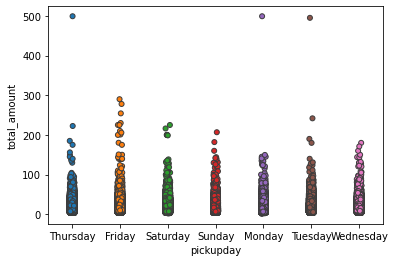

In [289]:
ax = sns.stripplot(x="pickupday", y="total_amount", data=dfcc, jitter=0.05, linewidth=1)
plt.savefig('visualizations/total_amount_billed_on_each day.jpg')

The above plot shows the total amount billed on each day. We can see the amount is slightly higher on Friday as compared to other days.

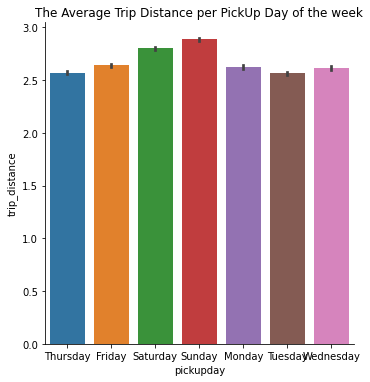

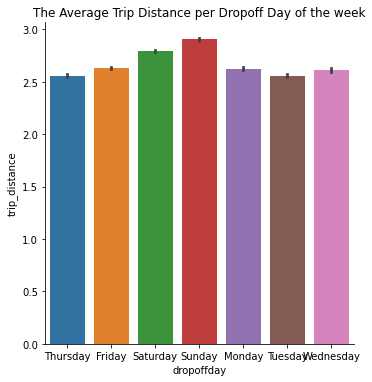

In [290]:
sns.catplot(x="pickupday",y="trip_distance",kind="bar",data=dfcc,height=5,aspect=1)
plt.title('The Average Trip Distance per PickUp Day of the week')
sns.catplot(x="dropoffday",y="trip_distance",kind="bar",data=dfcc,height=5,aspect=1)
plt.title('The Average Trip Distance per Dropoff Day of the week')
plt.savefig('visualizations/avg_trip_distance_per_pickup_dropoff_day_of_week.jpg')

The above graph shows the distribution of trip distance with days of the week. We can see from the above graph that maximum distances are travelled on Sunday.

#### Conclusion and Future Work
- Above is a basic visualization analysis of the trip data. In interest of time I will stop at this point.
- As a future work, I will like to analyse the data further and understand how trip distance, fare etc are related to each other.